# Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Load Data

In [2]:
# df_retailer_liq = pd.read_csv("../data/Retailer_Liquidation.csv")
df_retailer_stock = pd.read_csv("../data/retailer_stock.csv")
# df_wholesaler_sales = pd.read_csv("../data/WHOLESALER_SALES.csv")
# df_wholesaler_stock = pd.read_csv("../data/Wholesaler_Stock.csv")

In [36]:
df_retailer_stock.head()

,state_name,district_name,sub_district,retailer_id,dealership_nature,company,plant,product,opening_balance,received_quantity,sold_quantity,availabilty,closing_balance,created_date,to_date,product_id,from_date
0,Punjab,Mansa,Mansa,132999,Private Retailer,MOSAIC,MOSAIC,Imported DAP,2.75,0.00,0.00,2.75,2.75,2020-12-27,2020-12-26,71,2020-12-16
1,Punjab,Mansa,Mansa,132999,Private Retailer,MOSAIC,MOSAIC,MOP,0.00,1.25,0.00,1.25,1.25,2020-12-27,2020-12-26,8,2020-12-16
2,Punjab,Jalandhar,Jalandhar - II,115575,Private Retailer,MOSAIC,MOSAIC,Imported DAP,12.45,0.00,11.85,0.60,0.60,2020-12-27,2020-12-26,71,2020-12-16
3,Punjab,Jalandhar,Jalandhar - II,115575,Private Retailer,MOSAIC,MOSAIC,MOP,43.25,62.50,35.10,70.65,70.65,2020-12-27,2020-12-26,8,2020-12-16
4,Punjab,Bathinda,Talwandi Sabo,121756,Private Retailer,MOSAIC,MOSAIC,Imported DAP,14.50,0.00,10.85,3.65,3.65,2020-12-27,2020-12-26,71,2020-12-16


# Retailer Stock

In [3]:
df_retailer_stock.shape

(169403, 17)

In [4]:
df_retailer_stock_copy = df_retailer_stock.drop(columns=["sub_district","plant","company","closing_balance","created_date","product"])

In [5]:
df_retailer_stock.product_id.unique()

array([71,  8], dtype=int64)

In [6]:
df_retailer_stock_copy.shape

(169403, 11)

In [10]:
df_retailer_stock_copy.isna().sum()

state_name           0
district_name        0
retailer_id          0
dealership_nature    0
opening_balance      0
received_quantity    0
sold_quantity        0
availabilty          0
to_date              0
product_id           0
from_date            0
dtype: int64

In [11]:
df_retailer_stock_copy['to_date'] = pd.to_datetime(df_retailer_stock_copy['to_date'])
df_retailer_stock_copy['from_date'] = pd.to_datetime(df_retailer_stock_copy['from_date'])

In [12]:
# df_retailer_stock_copy["days"] =df_retailer_stock_copy["to_date"] -  df_retailer_stock_copy["from_date"]

In [13]:
df_retailer_stock_copy = df_retailer_stock_copy.drop(columns = ["to_date","from_date"])

In [14]:
df_retailer_stock_copy.head()

,state_name,district_name,retailer_id,dealership_nature,opening_balance,received_quantity,sold_quantity,availabilty,product_id
0,Punjab,Mansa,132999,Private Retailer,2.75,0.00,0.00,2.75,71
1,Punjab,Mansa,132999,Private Retailer,0.00,1.25,0.00,1.25,8
2,Punjab,Jalandhar,115575,Private Retailer,12.45,0.00,11.85,0.60,71
3,Punjab,Jalandhar,115575,Private Retailer,43.25,62.50,35.10,70.65,8
4,Punjab,Bathinda,121756,Private Retailer,14.50,0.00,10.85,3.65,71


In [15]:
df_retailer_stock_copy = pd.get_dummies(df_retailer_stock_copy) #dummy variables
print(df_retailer_stock_copy.shape)

(169403, 427)


In [16]:

y = df_retailer_stock_copy["opening_balance"]
x= df_retailer_stock_copy.drop(columns=["opening_balance"])

In [17]:
X = x.iloc[:, :].values
Y = y.iloc[:,].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [19]:
print("X-Train",X_train.shape)
print("y-Train",y_train.shape)

print("X-Test",X_test.shape)
print("y-Test",y_test.shape)

X-Train (152462, 426)
y-Train (152462,)
X-Test (16941, 426)
y-Test (16941,)


In [20]:
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))

# Random Forest

In [21]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
y_pred = regressor.predict(X_test)

In [23]:

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.9464648050759766


In [24]:
print(y_pred)

[14.395  0.45   1.1   ...  0.2    0.2    0.55 ]


In [25]:
print(y_test)

30651     14.40
30434      0.45
117571     1.10
153928     0.30
130920     3.20
          ...  
75320      2.95
167473     6.65
32500      0.20
127313     0.20
77576      0.55
Name: opening_balance, Length: 16941, dtype: float64


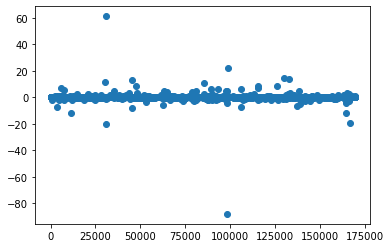

In [31]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

# XGBOOST

In [32]:
# regressor = XGBRegressor(tree_method = 'gpu_hist')
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.9024181575145971


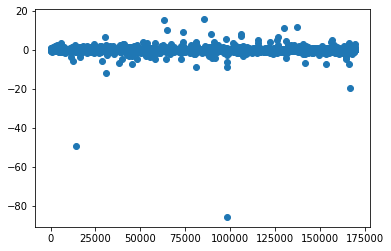

In [35]:
g=plt.plot(y_test - y_pred,marker='o',linestyle='')

# Save Model

In [29]:
file_name = "xgb_reg.pkl"
pickle.dump(regressor,open(file_name, "wb"))

In [31]:
xgb_model_loaded = pickle.load(open(file_name, "rb"))
y_pred = xgb_model_loaded.predict(X_test)

In [49]:
y_pred_0 = regressor.predict(X_test[0].reshape(1,-1)) # for a single value (row)

In [51]:
y_pred_0

array([14.343877], dtype=float32)